# Regression methods

Random Forest Regressor &
Decision Tree Regressor

Boosting Methods

1. Ada Boosting

2. GradientBoosting Regressor

3. XGB Regressor

4. LightGBM

5. CatBoost

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ignore warnings

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
# Import data
data = pd.read_csv(r"C:\SUHAIL\Reshma miss\insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.shape

(1338, 7)

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [11]:
data.shape

(1337, 7)

In [12]:
# split the x and y
x = data.iloc[:,:6]
y = data["charges"]

In [13]:
# split train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
x_train.reset_index(drop=True, inplace=True)

In [15]:
x_test.reset_index(drop=True, inplace=True)

In [16]:
y_train.reset_index(drop=True, inplace=True)

In [17]:
y_test.reset_index(drop=True, inplace=True)

For train

In [18]:
# OneHote Encoding
categorical_columns = x.select_dtypes(include=['O']).columns
numerical_columns = x.select_dtypes(exclude=['O']).columns

In [19]:
# for train
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop="first")

In [20]:
encoded = ohe.fit_transform(x_train[categorical_columns])

In [21]:
feature_names = ohe.get_feature_names_out(input_features=categorical_columns)

In [22]:
feature_names

array(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [23]:
data_ohe_columns = pd.DataFrame(encoded, columns=feature_names)

In [24]:
data_ohe_columns

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1064,0.0,1.0,0.0,0.0,0.0
1065,1.0,0.0,0.0,0.0,1.0
1066,1.0,0.0,0.0,0.0,1.0
1067,0.0,0.0,0.0,0.0,1.0


In [25]:
data_ohe_columns.shape

(1069, 5)

In [26]:
x_train[feature_names] = data_ohe_columns

In [27]:
x_train.drop(columns=categorical_columns, inplace=True)

In [28]:
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,23,24.510,0,1.0,0.0,0.0,0.0,0.0
1,21,25.745,2,1.0,0.0,0.0,0.0,0.0
2,52,37.525,2,0.0,0.0,1.0,0.0,0.0
3,63,41.470,0,1.0,0.0,0.0,1.0,0.0
4,47,26.600,2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1064,51,34.960,2,0.0,1.0,0.0,0.0,0.0
1065,27,45.900,2,1.0,0.0,0.0,0.0,1.0
1066,20,22.000,1,1.0,0.0,0.0,0.0,1.0
1067,38,28.000,3,0.0,0.0,0.0,0.0,1.0


In [29]:
x_train.isna().sum()

age                 0
bmi                 0
children            0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [30]:
x_train.describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,39.198316,30.540426,1.084191,0.514500,0.200187,0.246960,0.268475,0.247895
std,13.998594,6.051841,1.194723,0.500024,0.400328,0.431445,0.443374,0.431993
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.200000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.430000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# Apply standerdscaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])

In [33]:
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.157680,-0.996928,-0.907908,1.0,0.0,0.0,0.0,0.0
1,-1.300619,-0.792762,0.766904,1.0,0.0,0.0,0.0,0.0
2,0.914926,1.154664,0.766904,0.0,0.0,1.0,0.0,0.0
3,1.701087,1.806837,-0.907908,1.0,0.0,0.0,1.0,0.0
4,0.557580,-0.651417,0.766904,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1064,0.843457,0.730628,0.766904,0.0,1.0,0.0,0.0,0.0
1065,-0.871804,2.539188,0.766904,1.0,0.0,0.0,0.0,1.0
1066,-1.372088,-1.411872,-0.070502,1.0,0.0,0.0,0.0,1.0
1067,-0.085643,-0.419974,1.604310,0.0,0.0,0.0,0.0,1.0


For test

In [34]:
x_test

,age,sex,bmi,children,smoker,region
0,49,male,22.515,0,no,northeast
1,29,female,25.600,4,no,southwest
2,51,female,36.385,3,no,northwest
3,31,male,34.390,3,yes,northwest
4,31,male,38.390,2,no,southeast
...,...,...,...,...,...,...
263,64,male,40.480,0,no,southeast
264,63,female,36.300,0,no,southeast
265,22,female,34.580,2,no,northeast
266,61,male,36.300,1,yes,southwest


In [35]:
# Apply OneHot Encoding
x_test_encoded = ohe.transform(x_test[categorical_columns])

In [36]:
x_test_encoded = pd.DataFrame(x_test_encoded, columns=feature_names)

In [37]:
x_test[feature_names] = x_test_encoded

In [38]:
x_test.drop(columns=categorical_columns, inplace=True)

In [39]:
x_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,49,22.515,0,1.0,0.0,0.0,0.0,0.0
1,29,25.600,4,0.0,0.0,0.0,0.0,1.0
2,51,36.385,3,0.0,0.0,1.0,0.0,0.0
3,31,34.390,3,1.0,1.0,1.0,0.0,0.0
4,31,38.390,2,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
263,64,40.480,0,1.0,0.0,0.0,1.0,0.0
264,63,36.300,0,0.0,0.0,0.0,1.0,0.0
265,22,34.580,2,0.0,0.0,0.0,0.0,0.0
266,61,36.300,1,1.0,1.0,0.0,0.0,1.0


In [40]:
# Apply standerdscaler
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

In [41]:
x_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.700518,-1.326734,-0.907908,1.0,0.0,0.0,0.0,0.0
1,-0.728865,-0.816733,2.441716,0.0,0.0,0.0,0.0,1.0
2,0.843457,0.966203,1.604310,0.0,0.0,1.0,0.0,0.0
3,-0.585927,0.636397,1.604310,1.0,1.0,1.0,0.0,0.0
4,-0.585927,1.297663,0.766904,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
263,1.772556,1.643174,-0.907908,1.0,0.0,0.0,1.0,0.0
264,1.701087,0.952152,-0.907908,0.0,0.0,0.0,1.0,0.0
265,-1.229150,0.667808,0.766904,0.0,0.0,0.0,0.0,0.0
266,1.558148,0.952152,-0.070502,1.0,1.0,0.0,0.0,1.0


### Model Building

1. Random Forest Regressor

In [42]:
# Import random forest Regression

from sklearn.ensemble import RandomForestRegressor

In [43]:
rfr_model = RandomForestRegressor()

In [44]:
# Fitt the model on train data
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
# Predict the train and test dataset
y_pred_train_rfr = rfr_model.predict(x_train)
y_pred_test_rfr = rfr_model.predict(x_test)

In [46]:
y_pred_train_rfr

array([ 3749.637643 ,  5828.219538 , 27588.860405 , ...,  2183.0613926,
        7069.0968375,  5851.1288285])

In [47]:
y_pred_test_rfr

array([ 8805.250973 , 10002.8703633, 12813.432682 , 44561.9970173,
        5651.1384629, 10043.4928495, 38604.6046047,  2344.0897485,
       10698.4284195, 11510.7304405, 14401.4140967, 24727.43844  ,
       44480.1285221, 14989.2651111,  6027.9575857,  9529.262684 ,
       10286.3513454, 39840.1447861,  5659.2627247,  4878.601527 ,
        9687.4859177, 20479.039046 , 10233.302324 , 21438.7999186,
       39533.3720282, 18862.4571838, 42808.6562175, 45760.349344 ,
       10186.9247258, 13410.8939582,  4151.4406267,  9505.3041087,
        3620.7436967, 14404.6308272, 47175.2981066, 10036.1334724,
        8771.821235 ,  5561.1565946, 23222.4276924,  8460.3760084,
        2258.3073695, 21166.3796338, 41578.9493542,  9568.6185286,
        9252.3407999,  3460.106652 ,  2538.2568475,  7917.4644171,
        7963.134905 , 11792.7679993,  4585.6383342,  8344.6106463,
       22043.5971885,  5908.7690727,  8272.3183384, 12017.3023821,
       10688.7343817,  4514.4899694, 41328.8266499,  7512.4869

In [48]:
# Accuracy score for train
rfr_model.score(x_train, y_train)

0.9757170267701833

In [49]:
# Accuracy score for test
rfr_model.score(x_test, y_test)

0.8767332086518267

Model Evaluation

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate RMSE of train data
mse_train = mean_squared_error(y_train, y_pred_train_rfr)
print("Mean squared error:", mse_train)
rmse_train = np.sqrt(mse_train)
print("RMSE VALUE:", rmse_train)

Mean squared error: 3324695.2692909394
RMSE VALUE: 1823.3746925113717


In [51]:
# calculate RMSE of test data
mse_test = mean_squared_error(y_test, y_pred_test_rfr)
print("Mean squared error:", mse_test)
rmse_test = np.sqrt(mse_test)
print("RMSE VALUE:", rmse_test)

Mean squared error: 22651020.40511576
RMSE VALUE: 4759.308815901292


In [52]:
# Assuming y_train and y_pred_train are your actual and predicted target values for the train set
r_squared_train = r2_score(y_train, y_pred_train_rfr)
print("R-squared for train data:", r_squared_train)

R-squared for train data: 0.9757170267701833


In [53]:
# Assuming y_test and y_pred_test are your actual and predicted target values for the test set
r_squared_test = r2_score(y_test, y_pred_test_rfr)
print("R-squared for test data:", r_squared_test)

R-squared for test data: 0.8767332086518267


In [54]:
# Check to the Adjusted R Squared

def adjusted_r_squared(r_squared, n, k):
    adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
    return adjusted_r2

In [55]:
# For train data
n_train, p = x_train.shape[0], x_train.shape[1]
model_train_adjusted_r2 = adjusted_r_squared(r_squared_train, n_train, p)

# For test data
n_test = x_test.shape[0]
model_test_adjusted_r2 = adjusted_r_squared(r_squared_test, n_test, p)

In [56]:
print("Adjusted R-squared for train data:", model_train_adjusted_r2)
print("Adjusted R-squared for test data:", model_test_adjusted_r2)

Adjusted R-squared for train data: 0.9755337590476941
Adjusted R-squared for test data: 0.8729257401931958


In [57]:
d1 = {'Title':['RMSE_train', 'RMSE_test', 'R squared_train', 'R squared_test', 'Adjusted R squraed_train', 'Adjusted R squraed_test'], 'Vales':[rmse_train, rmse_test, r_squared_train, r_squared_test, model_train_adjusted_r2, model_test_adjusted_r2]}
pd.DataFrame(d1)

,Title,Vales
0,RMSE_train,1823.374693
1,RMSE_test,4759.308816
2,R squared_train,0.975717
3,R squared_test,0.876733
4,Adjusted R squraed_train,0.975534
5,Adjusted R squraed_test,0.872926


2. Decision Tree Regressor

In [58]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [60]:
dtree = DecisionTreeRegressor(max_depth=3)

In [61]:
# Fitt the model
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [62]:
# Predict the model
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

In [63]:
y_pred_train_dt

array([ 3952.95847765,  6660.674459  , 13836.47139609, ...,
        6660.674459  ,  6660.674459  ,  6660.674459  ])

In [64]:
y_pred_test_dt

array([10270.08823305,  6660.674459  , 10270.08823305, 38253.2089479 ,
        6660.674459  , 10270.08823305, 38253.2089479 ,  3952.95847765,
       10270.08823305, 10270.08823305, 13836.47139609, 25142.09734739,
       38253.2089479 , 13836.47139609,  6660.674459  , 10270.08823305,
        6660.674459  , 38253.2089479 ,  6660.674459  ,  6660.674459  ,
        3952.95847765, 18321.20829081, 10270.08823305, 18321.20829081,
       38253.2089479 ,  6660.674459  , 38253.2089479 , 45430.40106136,
       10270.08823305, 10270.08823305,  3952.95847765, 10270.08823305,
        6660.674459  , 13836.47139609, 45430.40106136, 10270.08823305,
        6660.674459  ,  6660.674459  , 25142.09734739, 10270.08823305,
        3952.95847765, 25142.09734739, 38253.2089479 , 10270.08823305,
       10270.08823305,  3952.95847765,  3952.95847765, 10270.08823305,
        6660.674459  ,  6660.674459  ,  6660.674459  ,  3952.95847765,
       25142.09734739,  3952.95847765,  6660.674459  , 10270.08823305,
      

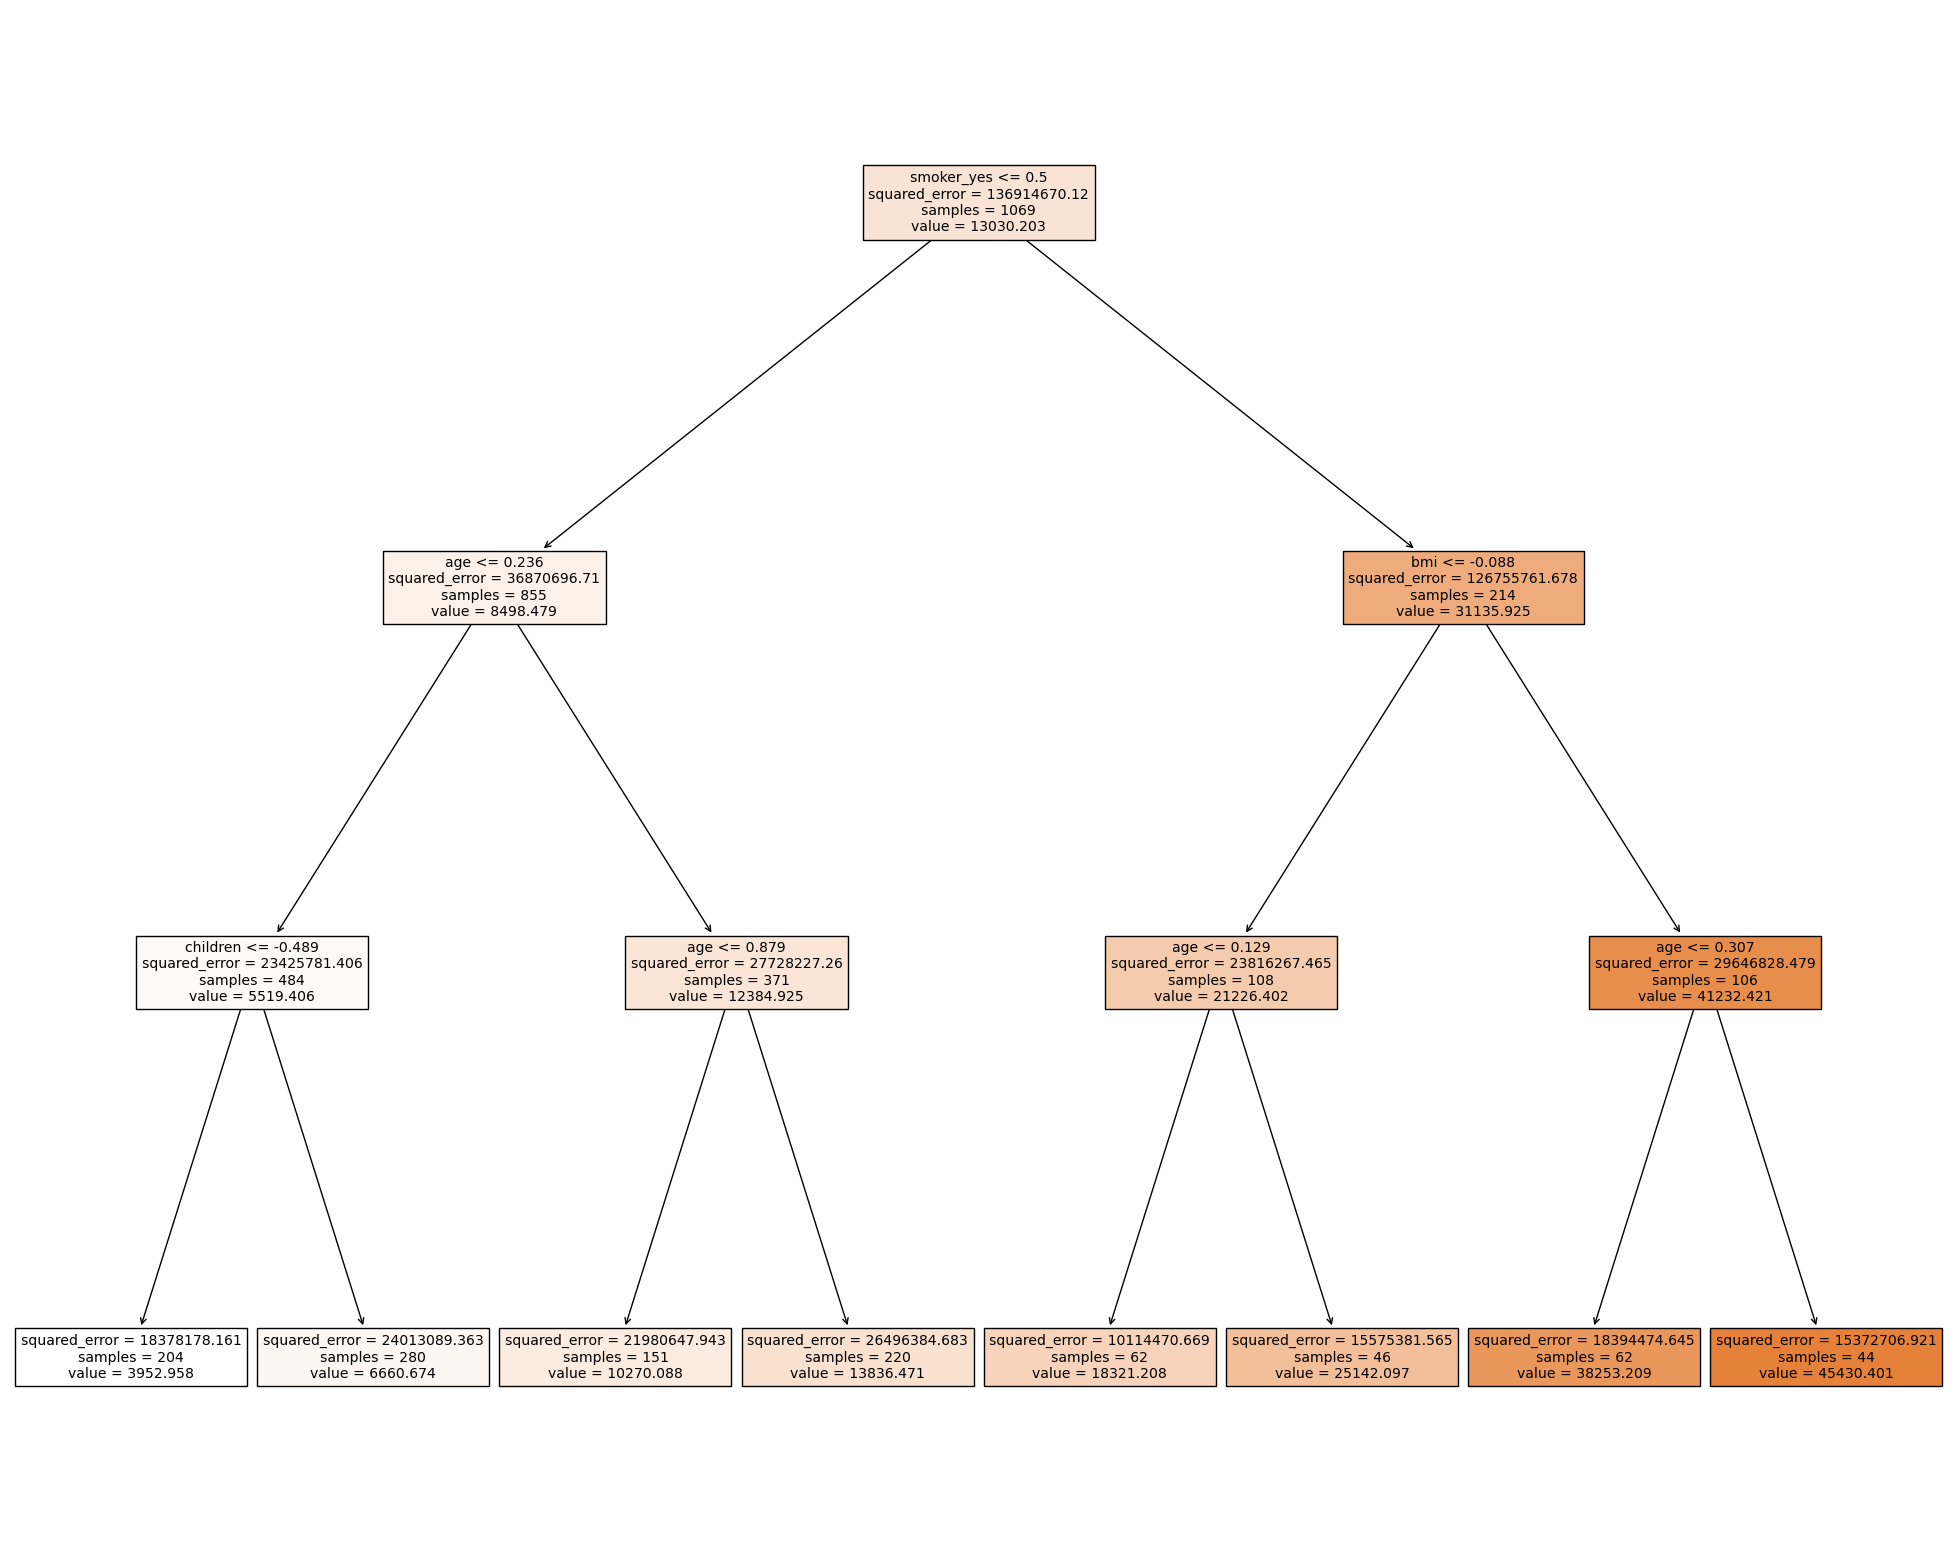

In [65]:
# plot the tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, feature_names=x_train.columns.to_list(),filled=True)

Model Evaluation

In [68]:
# accuracy score for tarin and test datas

train_accuracy = dtree.score(x_train, y_train)
test_accuracy = dtree.score(x_test, y_test)
print("train accuracy:" ,train_accuracy)
print("test accuracy:" ,test_accuracy)

train accuracy: 0.8443479114902656
test accuracy: 0.8929506204742996


In [69]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the independent variables for the model
x = add_constant(x_train)

# Calculate VIF
vif = pd.DataFrame()
vif['variable'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Filter out of the constant term
vif = vif[vif['variable'] != 'const']
print(vif)

           variable       VIF
1               age  1.023864
2               bmi  1.110796
3          children  1.004939
4          sex_male  1.011112
5        smoker_yes  1.018267
6  region_northwest  1.542936
7  region_southeast  1.678878
8  region_southwest  1.555261


In [70]:
from sklearn.metrics import mean_squared_error, r2_score

# RMSE
mse = mean_squared_error(y_train, y_pred_train_dt)
train_rmse = np.sqrt(mse)
print("Train_RMSE:" ,train_rmse)

mse = mean_squared_error(y_test, y_pred_test_dt)
test_rmse = np.sqrt(mse)
print("Test_RMSE:" ,test_rmse)

Train_RMSE: 4616.389753019697
Test_RMSE: 4435.197023772962


In [71]:
# R-Squared
# For train
train_rsquared = r2_score(y_train, y_pred_train_dt)
print("R-squared train data:" ,train_rsquared)

# For test
test_rsquared = r2_score(y_test, y_pred_test_dt)
print("R-squared test data:" ,test_rsquared)

R-squared train data: 0.8443479114902656
R-squared test data: 0.8929506204742996


In [72]:
# Check to the Adjusted R Squared
def adjusted_r_squared(r_squared, n, k):
    adjusted_r2 = 1 - (1 - r_squared)*(n - 1)/(n - k - 1)
    return adjusted_r2

In [73]:
# For train data
n_train, k = x_train.shape[0], x_train.shape[1]
train_adjusted_r = adjusted_r_squared(train_rsquared, n_train, k)

# For test data
n_test = x_test.shape[0]
test_adjusted_r = adjusted_r_squared(test_rsquared, n_test, k)

In [74]:
print("Adjusted R_Squared for train:" ,train_adjusted_r)
print("Adjusted R_Squared for test:" ,test_adjusted_r)

Adjusted R_Squared for train: 0.8431731787467959
Adjusted R_Squared for test: 0.8896440759329652


In [75]:
df = {"TITLE":["train accuracy","test accuracy","train rmse","test rmse","train r squared","test r squared","train adju r squared","test adju r squared"], "VALUES":[train_accuracy,test_accuracy,train_rmse,test_rmse,train_rsquared,test_rsquared,train_adjusted_r,test_adjusted_r]}
pd.DataFrame(d1)

,Title,Vales
0,RMSE_train,1823.374693
1,RMSE_test,4759.308816
2,R squared_train,0.975717
3,R squared_test,0.876733
4,Adjusted R squraed_train,0.975534
5,Adjusted R squraed_test,0.872926


# BOOSTING METHODS

1. Ada Boosting

2. GradientBoosting Regressor

3. XGB Regressor

4. LightGBM

5. CatBoost

### 1. Ada Boosting

In [64]:
# Import Ada Boosting Regressor
from sklearn.ensemble import AdaBoostRegressor

In [65]:
ada_model = AdaBoostRegressor()

In [66]:
# Fitt the model
ada_model.fit(x_train, y_train)

AdaBoostRegressor()

In [67]:
# Predict the train data
y_pred_train_ada = ada_model.predict(x_train)
# Predict the test data
y_pred_test_ada = ada_model.predict(x_test)

In [68]:
y_pred_train_ada

array([ 6194.03417687, 10471.50901223, 14410.03181375, ...,
        6944.57427705, 10471.50901223, 10471.50901223])

In [69]:
y_pred_test_ada

array([10818.10276571, 10471.50901223, 14410.03181375, 43824.00267143,
       10471.50901223, 14410.03181375, 38475.98023597,  6194.03417687,
       10471.50901223, 14410.03181375, 13694.35234742, 24897.91521743,
       43824.00267143, 14732.39644373, 10471.50901223, 14214.16940014,
        6944.57427705, 43824.00267143, 10471.50901223, 10471.50901223,
        6194.03417687, 18934.4207136 , 14410.03181375, 18934.4207136 ,
       43824.00267143, 10471.50901223, 44690.33146333, 45928.79437918,
       14410.03181375, 14214.16940014,  6194.03417687, 14410.03181375,
        6585.92042434, 17833.50332373, 45928.79437918, 14410.03181375,
       10471.50901223, 10471.50901223, 24897.91521743, 14214.16940014,
        6194.03417687, 24897.91521743, 43824.00267143, 14410.03181375,
       12451.40045171,  6194.03417687,  6194.03417687, 10471.50901223,
       10471.50901223, 10471.50901223, 10471.50901223,  7375.8223078 ,
       24897.91521743,  6194.03417687, 10471.50901223, 14214.16940014,
      

In [70]:
# Accuracy for train
ada_model.score(x_train, y_train)

0.8088316304797275

In [71]:
# Accuracy for test
ada_model.score(x_test, y_test)

0.8584962886882276

Model Evaluation

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate RMSE of train data
mse_train = mean_squared_error(y_train, y_pred_train_ada)
print("Mean squared error:", mse_train)
rmse_train = np.sqrt(mse_train)
print("RMSE VALUE:", rmse_train)

Mean squared error: 26173754.250229098
RMSE VALUE: 5116.029148688375


In [73]:
# calculate RMSE of test data
mse_test = mean_squared_error(y_test, y_pred_test_ada)
print("Mean squared error:", mse_test)
rmse_test = np.sqrt(mse_test)
print("RMSE VALUE:", rmse_test)

Mean squared error: 26002165.03785929
RMSE VALUE: 5099.231808602085


In [74]:
# Assuming y_train and y_pred_train are your actual and predicted target values for the train set
r_squared_train = r2_score(y_train, y_pred_train_ada)
print("R-squared for train data:", r_squared_train)

R-squared for train data: 0.8088316304797275


In [75]:
# Assuming y_test and y_pred_test are your actual and predicted target values for the test set
r_squared_test = r2_score(y_test, y_pred_test_ada)
print("R-squared for test data:", r_squared_test)

R-squared for test data: 0.8584962886882276


In [76]:
# Check to the Adjusted R Squared

def adjusted_r_squared(r_squared, n, k):
    adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
    return adjusted_r2

In [77]:
# For train data
n_train, p = x_train.shape[0], x_train.shape[1]
model_train_adjusted_r2 = adjusted_r_squared(r_squared_train, n_train, p)

# For test data
n_test = x_test.shape[0]
model_test_adjusted_r2 = adjusted_r_squared(r_squared_test, n_test, p)

In [78]:
print("Adjusted R-squared for train data:", model_train_adjusted_r2)
print("Adjusted R-squared for test data:", model_test_adjusted_r2)

Adjusted R-squared for train data: 0.8073888503324047
Adjusted R-squared for test data: 0.8541255176824585


In [79]:
d1 = {'Title':['RMSE_train', 'RMSE_test', 'R squared_train', 'R squared_test', 'Adjusted R squraed_train', 'Adjusted R squraed_test'], 'Vales':[rmse_train, rmse_test, r_squared_train, r_squared_test, model_train_adjusted_r2, model_test_adjusted_r2]}
pd.DataFrame(d1)

,Title,Vales
0,RMSE_train,5116.029149
1,RMSE_test,5099.231809
2,R squared_train,0.808832
3,R squared_test,0.858496
4,Adjusted R squraed_train,0.807389
5,Adjusted R squraed_test,0.854126


### 2. GradientBoosting Regressor

In [80]:
# Import Gradientboosting regressior
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
gbr_model = GradientBoostingRegressor()

In [82]:
# Fitt the model on train data
gbr_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [83]:
# Predict the train and test
y_pred_train_gbr = gbr_model.predict(x_train)
y_pred_test_gbr = gbr_model.predict(x_test)

In [84]:
y_pred_train_gbr

array([ 4408.08011797,  6474.59283615, 15977.73142595, ...,
        2307.86051104,  8025.33267223,  8089.42519648])

In [85]:
y_pred_test_gbr

array([10586.03915815,  7706.70706855, 13590.09499031, 39078.64011843,
        6832.31001365, 11942.11590953, 39345.50719667,  3695.03669972,
        9622.26356242, 11393.11632941, 13539.0761736 , 25026.19124049,
       38874.26882077, 13596.38629072, 11513.72431162,  8762.94411436,
        4253.03003875, 39670.31240155,  5668.88764985,  5046.74280536,
        3875.42178372, 19770.3664785 , 10375.44050147, 20805.79124161,
       38954.17716193,  7438.08882285, 43061.94200428, 45188.04583342,
       11397.00093788, 13048.80293326,  4578.75361597, 11010.72946451,
        3708.348972  , 16481.64892296, 46389.96889567, 10427.83737171,
        7456.3502337 ,  5874.41103443, 21951.2939407 ,  9357.08609302,
        2678.28906078, 20825.39644278, 41155.65860975, 10858.8652606 ,
        8596.57455626,  4056.80225012,  3320.72010731,  8445.64581567,
        5635.6615016 ,  8076.17197662,  7377.00548304,  5827.65919384,
       23416.61592929,  3305.16481765,  8051.29825135,  9266.47349016,
      

In [86]:
# Accuracy scorev for train
gbr_model.score(x_train, y_train)

0.8916033853020491

In [87]:
# Accuracy score for test
gbr_model.score(x_test, y_test)

0.9014090099883397

Model Evaluation

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate RMSE of train data
mse_train = mean_squared_error(y_train, y_pred_train_gbr)
print("Mean squared error:", mse_train)
rmse_train = np.sqrt(mse_train)
print("RMSE VALUE:", rmse_train)

Mean squared error: 14841086.743484898
RMSE VALUE: 3852.413106545675


In [89]:
# calculate RMSE of test data
mse_test = mean_squared_error(y_test, y_pred_test_gbr)
print("Mean squared error:", mse_test)
rmse_test = np.sqrt(mse_test)
print("RMSE VALUE:", rmse_test)

Mean squared error: 18116692.27445804
RMSE VALUE: 4256.370786768704


In [90]:
# Assuming y_train and y_pred_train are your actual and predicted target values for the train set
r_squared_train = r2_score(y_train, y_pred_train_gbr)
print("R-squared for train data:", r_squared_train)

R-squared for train data: 0.8916033853020491


In [91]:
# Assuming y_test and y_pred_test are your actual and predicted target values for the test set
r_squared_test = r2_score(y_test, y_pred_test_gbr)
print("R-squared for test data:", r_squared_test)

R-squared for test data: 0.9014090099883397


In [92]:
# Check to the Adjusted R Squared

def adjusted_r_squared(r_squared, n, k):
    adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
    return adjusted_r2

In [93]:
# For train data
n_train, p = x_train.shape[0], x_train.shape[1]
model_train_adjusted_r2 = adjusted_r_squared(r_squared_train, n_train, p)

# For test data
n_test = x_test.shape[0]
model_test_adjusted_r2 = adjusted_r_squared(r_squared_test, n_test, p)

In [94]:
print("Adjusted R-squared for train data:", model_train_adjusted_r2)
print("Adjusted R-squared for test data:", model_test_adjusted_r2)

Adjusted R-squared for train data: 0.8907852976439513
Adjusted R-squared for test data: 0.898363728443578


In [95]:
d1 = {'Title':['RMSE_train', 'RMSE_test', 'R squared_train', 'R squared_test', 'Adjusted R squraed_train', 'Adjusted R squraed_test'], 'Vales':[rmse_train, rmse_test, r_squared_train, r_squared_test, model_train_adjusted_r2, model_test_adjusted_r2]}
pd.DataFrame(d1)

,Title,Vales
0,RMSE_train,3852.413107
1,RMSE_test,4256.370787
2,R squared_train,0.891603
3,R squared_test,0.901409
4,Adjusted R squraed_train,0.890785
5,Adjusted R squraed_test,0.898364


### 3. XGB Regressor

In [96]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [97]:
# Import XGB Regressor
from xgboost import XGBRegressor

In [98]:
xgb_model = XGBRegressor()

In [99]:
# Fitt the model on train 
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
# Predict the train and test
y_pred_train_xgb = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)

In [101]:
y_pred_train_xgb

array([ 2819.251 ,  4013.0713, 29751.709 , ...,  1730.9246,  7024.6533,
        5934.482 ], dtype=float32)

In [102]:
y_pred_test_xgb

array([ 8686.059  ,  8074.0444 , 11259.594  , 39622.664  ,  6074.0474 ,
       10089.281  , 38825.9    ,  1851.2646 , 12567.912  , 10727.435  ,
       13258.642  , 27971.102  , 39444.04   , 17677.9    ,  9011.665  ,
        9418.917  , 10300.524  , 38335.805  ,  2872.6714 ,  3542.1106 ,
        3963.8386 , 20692.928  ,  8883.641  , 21624.254  , 36894.176  ,
       20499.9    , 40949.664  , 46670.38   ,  8724.545  , 19029.355  ,
        4150.664  ,  6663.1367 ,  1995.4052 , 13875.174  , 46491.78   ,
        8689.902  ,  5784.2637 ,  5267.5366 , 24575.059  ,  8061.5044 ,
        2294.115  , 19364.844  , 41480.883  ,  8625.847  ,  6745.086  ,
        3517.9583 ,  3300.5454 ,  7859.3965 ,  5769.1006 , 10274.5205 ,
        5909.7837 ,  5876.906  , 20542.404  ,  4972.647  ,  7886.595  ,
       10849.244  , 10671.079  ,  5770.8564 , 40765.586  ,  7211.493  ,
       10239.833  ,  4344.838  , 18306.229  ,  1977.3782 , 10610.957  ,
       15434.595  ,  6520.723  , 25824.205  , 14908.673  , 15565

In [103]:
# Accuracy scorev for train
xgb_model.score(x_train, y_train)

0.9958089670375463

In [104]:
# Accuracy scorev for test
xgb_model.score(x_test, y_test)

0.8651123701384134

Model Evaluation

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate RMSE of train data
mse_train = mean_squared_error(y_train, y_pred_train_xgb)
print("Mean squared error:", mse_train)
rmse_train = np.sqrt(mse_train)
print("RMSE VALUE:", rmse_train)

Mean squared error: 573813.89551601
RMSE VALUE: 757.505046528411


In [106]:
# calculate RMSE of test data
mse_test = mean_squared_error(y_test, y_pred_test_xgb)
print("Mean squared error:", mse_test)
rmse_test = np.sqrt(mse_test)
print("RMSE VALUE:", rmse_test)

Mean squared error: 24786419.95119783
RMSE VALUE: 4978.596182780627


In [107]:
# Assuming y_train and y_pred_train are your actual and predicted target values for the train set
r_squared_train = r2_score(y_train, y_pred_train_xgb)
print("R-squared for train data:", r_squared_train)

R-squared for train data: 0.9958089670375463


In [108]:
# Assuming y_test and y_pred_test are your actual and predicted target values for the test set
r_squared_test = r2_score(y_test, y_pred_test_xgb)
print("R-squared for test data:", r_squared_test)

R-squared for test data: 0.8651123701384134


In [109]:
# Check to the Adjusted R Squared

def adjusted_r_squared(r_squared, n, k):
    adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
    return adjusted_r2

In [110]:
# For train data
n_train, p = x_train.shape[0], x_train.shape[1]
model_train_adjusted_r2 = adjusted_r_squared(r_squared_train, n_train, p)

# For test data
n_test = x_test.shape[0]
model_test_adjusted_r2 = adjusted_r_squared(r_squared_test, n_test, p)

In [111]:
print("Adjusted R-squared for train data:", model_train_adjusted_r2)
print("Adjusted R-squared for test data:", model_test_adjusted_r2)

Adjusted R-squared for train data: 0.9957773366000938
Adjusted R-squared for test data: 0.8609459568608354


In [112]:
d1 = {'Title':['RMSE_train', 'RMSE_test', 'R squared_train', 'R squared_test', 'Adjusted R squraed_train', 'Adjusted R squraed_test'], 'Vales':[rmse_train, rmse_test, r_squared_train, r_squared_test, model_train_adjusted_r2, model_test_adjusted_r2]}
pd.DataFrame(d1)

,Title,Vales
0,RMSE_train,757.505047
1,RMSE_test,4978.596183
2,R squared_train,0.995809
3,R squared_test,0.865112
4,Adjusted R squraed_train,0.995777
5,Adjusted R squraed_test,0.860946


### 4. LightGBM

In [115]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [117]:
import lightgbm as ltb

In [118]:
lgb_model = ltb.LGBMRegressor()

In [119]:
# Fitt the model on train data
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 8
[LightGBM] [Info] Start training from score 13030.203373


LGBMRegressor()

In [121]:
# Predict the train and test
y_pred_train_lgbm = lgb_model.predict(x_train)
y_pred_test_lgbm = lgb_model.predict(x_test)

In [122]:
y_pred_train_lgbm

array([ 5830.1114661 ,  7368.10088911, 22506.76156631, ...,
        1552.0342888 ,  7597.00199145,  7337.32956819])

In [123]:
y_pred_test_lgbm

array([10231.26923431,  6849.31456159, 13101.42960129, 39435.58192397,
        4799.4864312 , 12002.70187926, 38504.98241726,  1635.96944483,
       10822.59352451, 11192.97329963, 13275.53385528, 26041.55622581,
       38990.07306845, 14645.25943475,  8499.9681879 ,  9770.82278332,
        7843.5231746 , 40035.40018933,  4242.12801604,  5031.1057933 ,
        6771.29470476, 20841.35724922,  9109.42822686, 22457.3578116 ,
       37849.68866229, 14220.77384236, 42888.92146383, 44847.63021691,
       10346.51720923, 12953.639619  ,  3148.30029433,  9594.47431516,
        3019.75410822, 14951.82540312, 47977.75867442,  7710.01287229,
        8114.27410549,  4848.18250404, 22961.98721788,  8083.01035705,
        3183.15867478, 20925.7785402 , 41409.29072125,  8017.37858778,
        6586.89106918,  2472.17002746,  3670.94215894,  7039.24037998,
        6317.31772951, 10337.63658178,  8064.41693878,  8835.96113241,
       23024.16521954,  5660.21938458,  9028.15296891, 12831.26958959,
      

In [124]:
# Accuracy score for train
lgb_model.score(x_train, y_train)

0.936527476097836

In [125]:
lgb_model.score(x_test, y_test)

0.884548397010699

Model Evaluation

In [126]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate RMSE of train data
mse_train = mean_squared_error(y_train, y_pred_train_lgbm)
print("Mean squared error:", mse_train)
rmse_train = np.sqrt(mse_train)
print("RMSE VALUE:", rmse_train)

Mean squared error: 8690319.671742864
RMSE VALUE: 2947.934814703823


In [127]:
# calculate RMSE of test data
mse_test = mean_squared_error(y_test, y_pred_test_lgbm)
print("Mean squared error:", mse_test)
rmse_test = np.sqrt(mse_test)
print("RMSE VALUE:", rmse_test)

Mean squared error: 21214932.152549576
RMSE VALUE: 4605.967016007558


In [128]:
# Assuming y_train and y_pred_train are your actual and predicted target values for the train set
r_squared_train = r2_score(y_train, y_pred_train_lgbm)
print("R-squared for train data:", r_squared_train)

R-squared for train data: 0.936527476097836


In [129]:
# Assuming y_test and y_pred_test are your actual and predicted target values for the test set
r_squared_test = r2_score(y_test, y_pred_test_lgbm)
print("R-squared for test data:", r_squared_test)

R-squared for test data: 0.884548397010699


In [130]:
# Check to the Adjusted R Squared

def adjusted_r_squared(r_squared, n, k):
    adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
    return adjusted_r2

In [131]:
# For train data
n_train, p = x_train.shape[0], x_train.shape[1]
model_train_adjusted_r2 = adjusted_r_squared(r_squared_train, n_train, p)

# For test data
n_test = x_test.shape[0]
model_test_adjusted_r2 = adjusted_r_squared(r_squared_test, n_test, p)

In [132]:
d1 = {'Title':['RMSE_train', 'RMSE_test', 'R squared_train', 'R squared_test', 'Adjusted R squraed_train', 'Adjusted R squraed_test'], 'Vales':[rmse_train, rmse_test, r_squared_train, r_squared_test, model_train_adjusted_r2, model_test_adjusted_r2]}
pd.DataFrame(d1)

,Title,Vales
0,RMSE_train,2947.934815
1,RMSE_test,4605.967016
2,R squared_train,0.936527
3,R squared_test,0.884548
4,Adjusted R squraed_train,0.936048
5,Adjusted R squraed_test,0.880982


### 5. CatBoost

In [133]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [135]:
# Import CatBoost Rgressor
from catboost import CatBoostRegressor

In [136]:
catb_model = CatBoostRegressor()

In [137]:
# Fitt the model on train
catb_model.fit(x_train, y_train)

Learning rate set to 0.041377
0:	learn: 11324.9253692	total: 146ms	remaining: 2m 25s
1:	learn: 10998.9170280	total: 148ms	remaining: 1m 14s
2:	learn: 10689.6416800	total: 152ms	remaining: 50.4s
3:	learn: 10361.8536782	total: 154ms	remaining: 38.4s
4:	learn: 10056.8934527	total: 157ms	remaining: 31.2s
5:	learn: 9782.6951652	total: 159ms	remaining: 26.4s
6:	learn: 9509.0343693	total: 162ms	remaining: 22.9s
7:	learn: 9256.0602835	total: 163ms	remaining: 20.2s
8:	learn: 9006.4126500	total: 166ms	remaining: 18.3s
9:	learn: 8776.9577950	total: 169ms	remaining: 16.7s
10:	learn: 8552.5391161	total: 171ms	remaining: 15.4s
11:	learn: 8356.4719850	total: 174ms	remaining: 14.3s
12:	learn: 8162.9922645	total: 177ms	remaining: 13.4s
13:	learn: 7963.7789273	total: 180ms	remaining: 12.7s
14:	learn: 7783.8258241	total: 183ms	remaining: 12s
15:	learn: 7616.9890030	total: 186ms	remaining: 11.5s
16:	learn: 7446.7655254	total: 189ms	remaining: 11s
17:	learn: 7281.5499051	total: 193ms	remaining: 10.5s
18:	l

In [138]:
# Predict the train and test
y_pred_train_cat = catb_model.predict(x_train)
y_pred_test_cat = catb_model.predict(x_test)

In [139]:
y_pred_train_cat

array([ 3867.79804609,  5794.20346074, 26845.22299325, ...,
        1834.40841037,  7064.55057166,  6758.29894796])

In [140]:
y_pred_test_cat

array([10648.64414252,  9097.99469319, 13530.00860234, 38364.80150553,
        7487.90489401,  9800.07777613, 40759.30459305,  3781.50714774,
       11719.35799428, 11201.46568933, 13779.80618062, 28086.71422962,
       39533.99096967, 14638.57420232,  7204.55830649,  9073.66645164,
        5087.00955423, 39736.40500659,  4618.62979414,  5021.70714293,
        4942.01070284, 21443.3635761 ,  9797.97828953, 21825.43163426,
       37253.19376678, 18373.01509447, 44351.4043271 , 43061.56100814,
       11400.28933   , 18502.96297374,  4519.17739066,  9684.25322527,
        2683.37106802, 12960.39610674, 44242.9139966 ,  9956.92320681,
        9529.75492332,  4817.68835593, 21893.74786637,  9125.63129199,
        3360.8353232 , 20102.29255866, 42972.62675986, 10130.09252625,
        7765.28835749,  3475.65462305,  3353.01918492,  7532.51273043,
        5759.53371398,  8744.00004609,  6332.8590089 ,  6542.13661808,
       22598.27039115,  4647.47070031,  8138.90419412, 10520.27792119,
      

In [141]:
# Accuracy score for train
catb_model.score(x_train, y_train)

0.9480350914726857

In [142]:
# Accuracy score for test
catb_model.score(x_test, y_test)

0.881902117207155

Model Evaluation

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate RMSE of train data
mse_train = mean_squared_error(y_train, y_pred_train_cat)
print("Mean squared error:", mse_train)
rmse_train = np.sqrt(mse_train)
print("RMSE VALUE:", rmse_train)

Mean squared error: 7114758.308828511
RMSE VALUE: 2667.3504285767385


In [144]:
# calculate RMSE of test data
mse_test = mean_squared_error(y_test, y_pred_test_cat)
print("Mean squared error:", mse_test)
rmse_test = np.sqrt(mse_test)
print("RMSE VALUE:", rmse_test)

Mean squared error: 21701202.113600276
RMSE VALUE: 4658.454906253819


In [145]:
# Assuming y_train and y_pred_train are your actual and predicted target values for the train set
r_squared_train = r2_score(y_train, y_pred_train_cat)
print("R-squared for train data:", r_squared_train)

R-squared for train data: 0.9480350914726857


In [146]:
# Assuming y_test and y_pred_test are your actual and predicted target values for the test set
r_squared_test = r2_score(y_test, y_pred_test_cat)
print("R-squared for test data:", r_squared_test)

R-squared for test data: 0.881902117207155


In [147]:
# Check to the Adjusted R Squared

def adjusted_r_squared(r_squared, n, k):
    adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
    return adjusted_r2

In [148]:
# For train data
n_train, p = x_train.shape[0], x_train.shape[1]
model_train_adjusted_r2 = adjusted_r_squared(r_squared_train, n_train, p)

# For test data
n_test = x_test.shape[0]
model_test_adjusted_r2 = adjusted_r_squared(r_squared_test, n_test, p)

In [149]:
d1 = {'Title':['RMSE_train', 'RMSE_test', 'R squared_train', 'R squared_test', 'Adjusted R squraed_train', 'Adjusted R squraed_test'], 'Vales':[rmse_train, rmse_test, r_squared_train, r_squared_test, model_train_adjusted_r2, model_test_adjusted_r2]}
pd.DataFrame(d1)

,Title,Vales
0,RMSE_train,2667.350429
1,RMSE_test,4658.454906
2,R squared_train,0.948035
3,R squared_test,0.881902
4,Adjusted R squraed_train,0.947643
5,Adjusted R squraed_test,0.878254
